In [1]:
#import git
import pandas as pd
import re
import nltk
from collections import Counter
from nltk.corpus import stopwords
#nltk.download('stopwords')

In [2]:
#! git clone https://github.com/Thiag0car/Costume-Trends-Scraper

In [3]:
df = pd.read_csv(r"C:\Users\danyu\Documents\Trabalho_Savino\Costume-Trends-Scraper\Web Scraping\Redes Sociais Scraping\textos_redes_sociais.csv")

In [4]:
df.head()

,Texto,Data,Redes Sociais,sentimento
0,Olá gente linda! no Vídeo estou fazendo uma pa...,2023-05-26 05:52 AM,youtube.com,Positive
1,Video can be found here,2023-05-26 05:42 AM,youtube.com,Negative
2,Aô época boa sô 🌽 🌾 #festajunina #docesjuninos...,2023-05-26 05:42 AM,tiktok.com,Positive
3,muito pra o sao joao? falta muito pra o sao jo...,2023-05-26 05:41 AM,twitter.com,Neutral
4,seus frescurentos #vaiprofy #festajunina #vaip...,2023-05-26 05:31 AM,tiktok.com,Neutral


In [5]:
df['Redes Sociais'].unique()

array(['youtube.com', 'tiktok.com', 'twitter.com', 'www2.bauru.sp.gov.br',
       'waldineypassos.com.br', 'emsergipe.com.br', '7minutos.com.br',
       'br.freepik.com', 'dpontanews.com.br', 'revolucaodesabores.com',
       'peleja.blog.br', 'olhandoatento.blogspot.com',
       'jornalgrandebahia.com.br', 'blognossavoz.com.br',
       'jornalzonasul.com.br', 'davidgomesbalancas.wordpress.com',
       'abelhaonoticias.blogspot.com', 'globoplay.globo.com',
       'utahroadsafety.com', 'audioativo.com', 'ifolharegional.com.br',
       'terra.com.br', 'jornalopiniao.net', 'fashionbubbles.com',
       'sopacultural.com', 'sergipepress.com.br', 'hojepr.com',
       'fabionoticiasdacidade.blogspot.com', 'osollo.com.br',
       'blogalangoncalves.net', 'itatiaia.com.br', 'sampi.net.br',
       'cornershopapp.com', 'novoblogdodimitri.blogspot.com',
       'ailtonpitombo.com.br', 'qualidadedevidanocampo.blogspot.com',
       'bilhetedanoticia.blogspot.com', 'blogdofinfa.com.br',
       'correio

# Pyspark

In [6]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import Tokenizer, StopWordsRemover
from pyspark.sql.functions import explode
from nltk.corpus import stopwords

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Get the Portuguese stopwords from NLTK
stopwords = stopwords.words('portuguese')

# Add your custom stopwords to the list
custom_stopwords = ['[...]', '...', ' ', '',  '-', 'video', 'can', 'be', 'found', 'here', 'https']
stopwords.extend(custom_stopwords)

# Load the CSV file into a DataFrame
df = spark.read.csv(r"C:\Users\danyu\Documents\Trabalho_Savino\Costume-Trends-Scraper\Web Scraping\Redes Sociais Scraping\textos_redes_sociais.csv", header=True)

# Tokenize the text column
tokenizer = Tokenizer(inputCol="Texto", outputCol="words")
df = tokenizer.transform(df)

# Remove stopwords from the tokenized words
remover = StopWordsRemover(inputCol="words", outputCol="filtered_words", stopWords=stopwords)
df = remover.transform(df)

# Explode the filtered words column into individual rows
df = df.select(explode("filtered_words").alias("word"))

# Perform MapReduce to count word occurrences
word_counts = df.groupby("word").count().orderBy("count", ascending=False)

word_counts.show(15)

+------------+-----+
|        word|count|
+------------+-----+
|       festa|  674|
|      junina|  467|
|#festajunina|  372|
|    #saojoao|  259|
|       milho|  156|
|       fazer|  139|
|     pamonha|  137|
|        joão|  129|
|         dia|  119|
|      festas|  102|
|      camisa|   92|
|      melhor|   89|
|     quentão|   86|
|           1|   85|
| tradicional|   83|
+------------+-----+
only showing top 15 rows



In [7]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import Tokenizer, StopWordsRemover
from pyspark.sql.functions import explode
from nltk.corpus import stopwords

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Get the Portuguese stopwords from NLTK
stopwords = stopwords.words('portuguese')

# Add your custom stopwords to the list
custom_stopwords = ['[...]', '...', ' ', '',  '-', 'video', 'can', 'be', 'found', 'here', 'https']
stopwords.extend(custom_stopwords)

# Load the CSV file into a DataFrame
df = spark.read.csv(r"C:\Users\danyu\Documents\Trabalho_Savino\Costume-Trends-Scraper\Web Scraping\Redes Sociais Scraping\textos_redes_sociais.csv", header=True)

# Tokenize the text column
tokenizer = Tokenizer(inputCol="Texto", outputCol="words")
df = tokenizer.transform(df)

# Remove stopwords from the tokenized words
remover = StopWordsRemover(inputCol="words", outputCol="filtered_words", stopWords=stopwords)
df = remover.transform(df)

# Explode the filtered words column into individual rows
df = df.select(explode("filtered_words").alias("word"))

# Perform MapReduce to count word occurrences
word_counts = df.groupby("word").count().orderBy("count", ascending=False)

word_counts.show(15)

+------------+-----+
|        word|count|
+------------+-----+
|       festa|  674|
|      junina|  467|
|#festajunina|  372|
|    #saojoao|  259|
|       milho|  156|
|       fazer|  139|
|     pamonha|  137|
|        joão|  129|
|         dia|  119|
|      festas|  102|
|      camisa|   92|
|      melhor|   89|
|     quentão|   86|
|           1|   85|
| tradicional|   83|
+------------+-----+
only showing top 15 rows



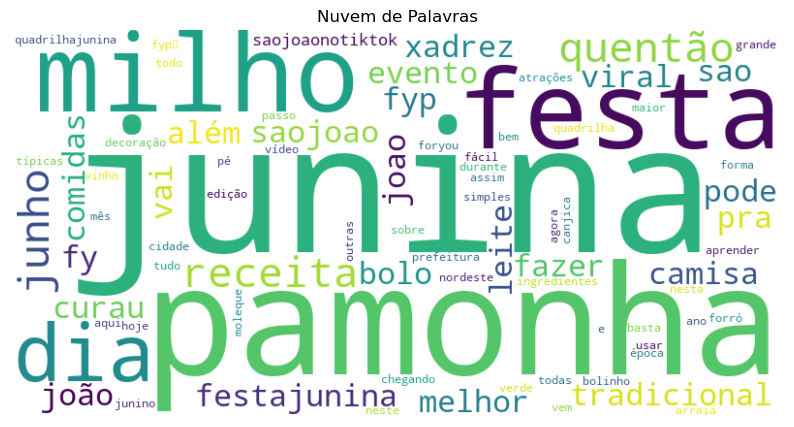

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Criação de wordcloud das palavras mais utilizadas
text_cloud = ' '.join([row['word'] for row in word_counts.limit(100).collect()])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_cloud)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras')
plt.show()